In [ ]:
import pandas as pd
import keras

from helpers import data, utils, generators

In [7]:
NUM_FOLDS = 10
INPUT_SHAPE = (192, 192, 1)
GPU_BATCH_SIZE = 16
DATA_BATCH_SIZE = 16

In [8]:
fold_dfs = data.get_fold_dfs(
    fold_definition_csv='../data/DATASET_CSVS/deepship_5k_seg_3s.csv',
    new_path_to_root='../data/deepship_baseline_unnorm_mat',
    ext='mat',
    unix=False,
    label_encodings={0:'Tanker', 1:'Cargo', 2:'Tug', 3:'Passengership'},
    n_folds=NUM_FOLDS
)
print('Successfully loaded folds.\n')

Successfully loaded folds.



In [9]:
train_df = pd.concat(fold_dfs[2:])
val_df = fold_dfs[1]
test_df = fold_dfs[0]

train_gen = generators.DeepShipGenerator(
    train_df,
    ext='mat',
    mat_var_name='Ptrans',
    batch_size=DATA_BATCH_SIZE
)
val_gen = generators.DeepShipGenerator(
    val_df,
    ext='mat',
    mat_var_name='Ptrans',
    batch_size=DATA_BATCH_SIZE
)
test_gen = generators.DeepShipGenerator(
    test_df,
    ext='mat',
    mat_var_name='Ptrans',
    batch_size=DATA_BATCH_SIZE
)

In [10]:
from models import cnn_lstm

cnn_lstm_model = cnn_lstm.get_cnn_lstm(
    input_shape=INPUT_SHAPE,
    input_name='spec',
    num_classes=4,
    verbose=True
)

cnn_lstm_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)

Model: "cnn_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spec (InputLayer)           [(None, 192, 192, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 192, 192, 128)     3328      
                                                                 
 batch_normalization_4 (Batc  (None, 192, 192, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 192, 192, 128)     0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 96, 96, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 128)       409

In [11]:
keras.backend.clear_session()

history10 = cnn_lstm_model.fit(
    x=train_gen,
    validation_data=val_gen,
    batch_size=GPU_BATCH_SIZE,
    epochs=10,
    verbose=2
)

Epoch 1/10
2716/2716 - 510s - loss: 0.7809 - acc: 0.6866 - val_loss: 0.7560 - val_acc: 0.6930 - 510s/epoch - 188ms/step
Epoch 2/10
2716/2716 - 695s - loss: 0.4770 - acc: 0.8239 - val_loss: 0.8088 - val_acc: 0.6700 - 695s/epoch - 256ms/step
Epoch 3/10
2716/2716 - 849s - loss: 0.3185 - acc: 0.8904 - val_loss: 0.8159 - val_acc: 0.6627 - 849s/epoch - 313ms/step
Epoch 4/10
2716/2716 - 844s - loss: 0.2134 - acc: 0.9340 - val_loss: 0.8932 - val_acc: 0.6556 - 844s/epoch - 311ms/step
Epoch 5/10
2716/2716 - 832s - loss: 0.1400 - acc: 0.9629 - val_loss: 0.8088 - val_acc: 0.7052 - 832s/epoch - 306ms/step
Epoch 6/10
2716/2716 - 816s - loss: 0.0866 - acc: 0.9815 - val_loss: 0.9759 - val_acc: 0.6749 - 816s/epoch - 301ms/step
Epoch 7/10
2716/2716 - 845s - loss: 0.0526 - acc: 0.9907 - val_loss: 1.0313 - val_acc: 0.6706 - 845s/epoch - 311ms/step
Epoch 8/10
2716/2716 - 771s - loss: 0.0340 - acc: 0.9944 - val_loss: 1.0272 - val_acc: 0.7032 - 771s/epoch - 284ms/step
Epoch 9/10
2716/2716 - 792s - loss: 0.02

In [12]:
cnn_lstm_model.save('models/cnn_lstm_mark_10.keras')

In [13]:
evals10 = cnn_lstm_model.evaluate(
    test_gen,
    batch_size=GPU_BATCH_SIZE,
    verbose=2
)

283/283 - 35s - loss: 1.4982 - acc: 0.6469 - 35s/epoch - 122ms/step


In [14]:
history20 = cnn_lstm_model.fit(
    x=train_gen,
    validation_data=val_gen,
    batch_size=GPU_BATCH_SIZE,
    epochs=10,
    verbose=2
)

Epoch 1/10
2716/2716 - 846s - loss: 0.0163 - acc: 0.9969 - val_loss: 1.2609 - val_acc: 0.6758 - 846s/epoch - 311ms/step
Epoch 2/10
2716/2716 - 858s - loss: 0.0145 - acc: 0.9968 - val_loss: 1.1564 - val_acc: 0.7055 - 858s/epoch - 316ms/step
Epoch 3/10
2716/2716 - 841s - loss: 0.0111 - acc: 0.9978 - val_loss: 1.2339 - val_acc: 0.7006 - 841s/epoch - 310ms/step
Epoch 4/10
2716/2716 - 833s - loss: 0.0134 - acc: 0.9968 - val_loss: 1.2744 - val_acc: 0.6848 - 833s/epoch - 307ms/step
Epoch 5/10
2716/2716 - 840s - loss: 0.0097 - acc: 0.9978 - val_loss: 1.2773 - val_acc: 0.6921 - 840s/epoch - 309ms/step
Epoch 6/10
2716/2716 - 855s - loss: 0.0080 - acc: 0.9982 - val_loss: 1.3451 - val_acc: 0.6886 - 855s/epoch - 315ms/step
Epoch 7/10
2716/2716 - 845s - loss: 0.0102 - acc: 0.9973 - val_loss: 1.3749 - val_acc: 0.6924 - 845s/epoch - 311ms/step
Epoch 8/10
2716/2716 - 866s - loss: 0.0094 - acc: 0.9977 - val_loss: 1.4327 - val_acc: 0.6706 - 866s/epoch - 319ms/step
Epoch 9/10
2716/2716 - 864s - loss: 0.00

In [15]:
cnn_lstm_model.save('models/cnn_lstm_mark_20.keras')

In [16]:
evals20 = cnn_lstm_model.evaluate(
    test_gen,
    batch_size=GPU_BATCH_SIZE,
    verbose=2
)

283/283 - 23s - loss: 1.5562 - acc: 0.6360 - 23s/epoch - 80ms/step


In [17]:
evals10

[1.498216986656189, 0.6468639373779297]

In [18]:
evals20

[1.5561892986297607, 0.6360424160957336]

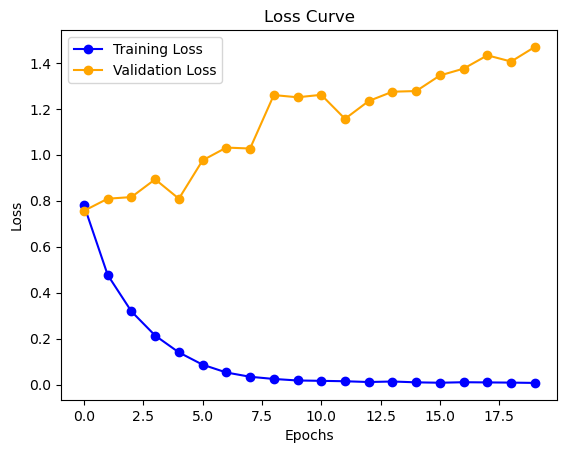

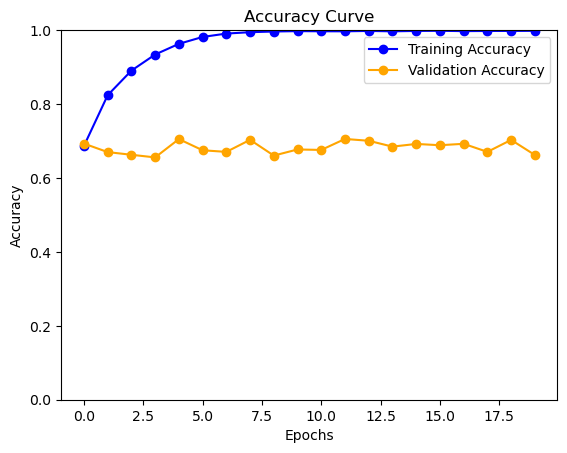

In [42]:
import matplotlib.pyplot as plt

# Combine history metrics for complete curves
training_loss = history10.history['loss'] + history20.history['loss']
val_loss = history10.history['val_loss'] + history20.history['val_loss']
training_acc = history10.history['acc'] + history20.history['acc']
val_acc = history10.history['val_acc'] + history20.history['val_acc']

# Plotting loss and accuracy curves
plt.figure()
plt.plot(training_loss, 'o-b', label='Training Loss')
plt.plot(val_loss, 'o-', color='orange', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(training_acc, 'o-b', label='Training Accuracy')
plt.plot(val_acc, 'o-', color='orange', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0, 1))
plt.legend()
plt.title('Accuracy Curve')
plt.show()